In [49]:
from random import random
from pandas import Series, DataFrame
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [48]:
data = pd.read_csv("aviationdata.csv", encoding='latin-1')
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02E+13,Accident,CEN21FA130,2/16/2021,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
1,2.02E+13,Accident,ERA21FA130,2/15/2021,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,Aobv,Caribbean Buzz Management Llc.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
2,2.02E+13,Accident,ANC21LA017,2/13/2021,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
3,2.02E+13,Accident,CEN21LA127,2/12/2021,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
4,2.02E+13,Accident,ERA21LA131,2/10/2021,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85971,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,Approach,Probable Cause,16-04-1980
85972,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
85973,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
85974,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [50]:
new_data = data.drop(['Event.Id','Investigation.Type','Accident.Number','Latitude','Longitude',
                      'Airport.Code','Airport.Name','Aircraft.damage','Aircraft.Category',
                      'Registration.Number','Make','Model','Amateur.Built','Number.of.Engines','Engine.Type',
                      'FAR.Description','Schedule','Purpose.of.flight','Air.carrier','Broad.phase.of.flight',
                      'Report.Status','Publication.Date'],axis=1)
new_data

,Event.Date,LOCATION,Country,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,2/16/2021,"JANESVILLE, WI",United States,Fatal,2.0,0.0,0.0,0.0,VMC
1,2/15/2021,"St Thomas, CB",United States,Fatal,4.0,0.0,0.0,0.0,VMC
2,2/13/2021,"TYONEK, AK",United States,Minor,0.0,0.0,2.0,0.0,NaN
3,2/12/2021,"PRAIRIE DU SAC, WI",United States,Non-Fatal,0.0,0.0,0.0,1.0,VMC
4,2/10/2021,"LAKE PLACID, FL",United States,Minor,0.0,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
85971,8/2/1979,"Canton, OH",United States,Fatal(1),1.0,2.0,NaN,NaN,VMC
85972,6/19/1977,"EUREKA, CA",United States,Fatal(2),2.0,0.0,0.0,0.0,IMC
85973,8/30/1974,"Saltville, VA",United States,Fatal(3),3.0,NaN,NaN,NaN,IMC
85974,7/19/1962,"BRIDGEPORT, CA",United States,Fatal(4),4.0,0.0,0.0,0.0,UNK


In [54]:
weather_condition=new_data.groupby(by=["Weather.Condition"]).sum()
weather_condition

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Weather.Condition,,,,
IMC,11737.0,2054.0,2789.0,39245.0
UNK,2715.0,252.0,682.0,15001.0
Unk,4.0,3.0,0.0,3.0
VMC,25241.0,14950.0,24716.0,303852.0


In [63]:
weather_condition_1 = weather_condition.drop(['Unk'], axis = 0).sort_values(by='Total.Fatal.Injuries', ascending=False)
weather_condition_1

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Weather.Condition,,,,
VMC,25241.0,14950.0,24716.0,303852.0
IMC,11737.0,2054.0,2789.0,39245.0
UNK,2715.0,252.0,682.0,15001.0


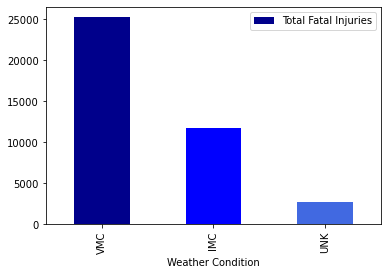

In [73]:
fatal_injuries = weather_condition_1['Total.Fatal.Injuries']
weather_condition = weather_condition_1.index.values
df = pd.DataFrame({'Total Fatal Injuries': fatal_injuries,
                   'Weather Condition': weather_condition})
# First 5 States  
bar_graph = df.head().plot.bar(x='Weather Condition', y='Total Fatal Injuries', color=['#00008B','#0000FF','#4169E1'])